In [2]:
import mysql.connector
import requests
import pandas as pd
from sqlalchemy import create_engine

In [9]:
response = requests.get("https://data.nasa.gov/resource/gh4g-9sfh.json")
data = response.json()

In [10]:
data

[{'name': 'Aachen',
  'id': '1',
  'nametype': 'Valid',
  'recclass': 'L5',
  'mass': '21',
  'fall': 'Fell',
  'year': '1880-01-01T00:00:00.000',
  'reclat': '50.775000',
  'reclong': '6.083330',
  'geolocation': {'latitude': '50.775', 'longitude': '6.08333'}},
 {'name': 'Aarhus',
  'id': '2',
  'nametype': 'Valid',
  'recclass': 'H6',
  'mass': '720',
  'fall': 'Fell',
  'year': '1951-01-01T00:00:00.000',
  'reclat': '56.183330',
  'reclong': '10.233330',
  'geolocation': {'latitude': '56.18333', 'longitude': '10.23333'}},
 {'name': 'Abee',
  'id': '6',
  'nametype': 'Valid',
  'recclass': 'EH4',
  'mass': '107000',
  'fall': 'Fell',
  'year': '1952-01-01T00:00:00.000',
  'reclat': '54.216670',
  'reclong': '-113.000000',
  'geolocation': {'latitude': '54.21667', 'longitude': '-113.0'}},
 {'name': 'Acapulco',
  'id': '10',
  'nametype': 'Valid',
  'recclass': 'Acapulcoite',
  'mass': '1914',
  'fall': 'Fell',
  'year': '1976-01-01T00:00:00.000',
  'reclat': '16.883330',
  'reclong': 

In [59]:
df = pd.read_csv("Meteorite_Landings.csv")

In [64]:
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [11]:
import re
def date_reformat(date):
    pattern = r'^(\d{4})'
    match = re.search(pattern, date)
    if match:
        return match.group(1)
    else:
        return None

In [14]:
df['year'] = df['year'].apply(date_reformat)

In [16]:
df['id'] = df['id'].astype('int')
df['mass'] = df['mass'].astype('float')
df['year'] = df['year'].astype('float')
df['reclat'] = df['reclat'].astype('float')
df['reclong'] = df['reclong'].astype('float')

In [63]:
df.describe()

,id,mass (g),year,reclat,reclong
count,38400.000000,3.828200e+04,38222.000000,38400.000000,38400.000000
mean,25438.969063,1.558098e+04,1989.827979,-39.123548,61.066678
std,17444.801545,6.273203e+05,26.709437,46.378727,80.634448
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10878.750000,6.700000e+00,1986.000000,-76.714247,0.000000
50%,21788.500000,2.934500e+01,1996.000000,-71.500000,35.666670
75%,40042.250000,1.891750e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


In [62]:
df = df[df['reclong'] < 180.0]

In [65]:
df = df.drop("GeoLocation", axis = 1)

In [66]:
conn = mysql.connector.connect(host='localhost',
                                    database= "sgtbootfinal",
                                    user='root',
                                    password='')

In [67]:
engine = create_engine('mysql+mysqlconnector://root:@localhost/sgtbootfinal')

In [68]:
# Set the chunk size
chunk_size = 1000

# Iterate over chunks
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk.to_sql(name='meteorite_landings', con=engine, if_exists='append', index=False)

In [69]:
cursor = conn.cursor()

primary_key_sql = """
ALTER TABLE meteorite_landings
ADD PRIMARY KEY (id);
"""

cursor.execute(primary_key_sql)

conn.commit()


In [23]:

cursor.close()
conn.close()

# Getting the table from mysql database

In [70]:
engine = create_engine('mysql+mysqlconnector://root:@localhost/sgtbootfinal')

In [71]:
query = "SELECT * FROM meteorite_landings"
meteor = pd.read_sql(query, engine)

In [72]:
meteor

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667
3,Abbott,5,Valid,H3-6,21100.0,Found,1951.0,36.30000,-104.28333
4,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
...,...,...,...,...,...,...,...,...,...
38395,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319
38396,Antelope,57455,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465
38397,Northwest Africa 7870,57456,Valid,L4,42.0,Found,2004.0,0.00000,0.00000
38398,Northwest Africa 7871,57457,Valid,L6,450.0,Found,2004.0,0.00000,0.00000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Counts of meteorite categories
category_counts = meteor['recclass'].value_counts()
filtered_cats = category_counts[category_counts >= 100]
filtered_cats


recclass
L6                 7543
H5                 6273
H6                 3903
H4                 3892
L5                 3298
LL5                2202
LL6                1660
L4                  972
H4/5                395
CM2                 332
H3                  314
CO3                 308
Iron, IIIAB         276
L3                  270
LL                  223
Ureilite            214
E3                  205
LL4                 198
CV3                 185
Howardite           179
Diogenite           178
Eucrite-pmict       169
H5/6                166
Eucrite             117
CR2                 116
Iron, IIAB          114
Mesosiderite        109
H~5                 106
Iron, ungrouped     105
Name: count, dtype: int64

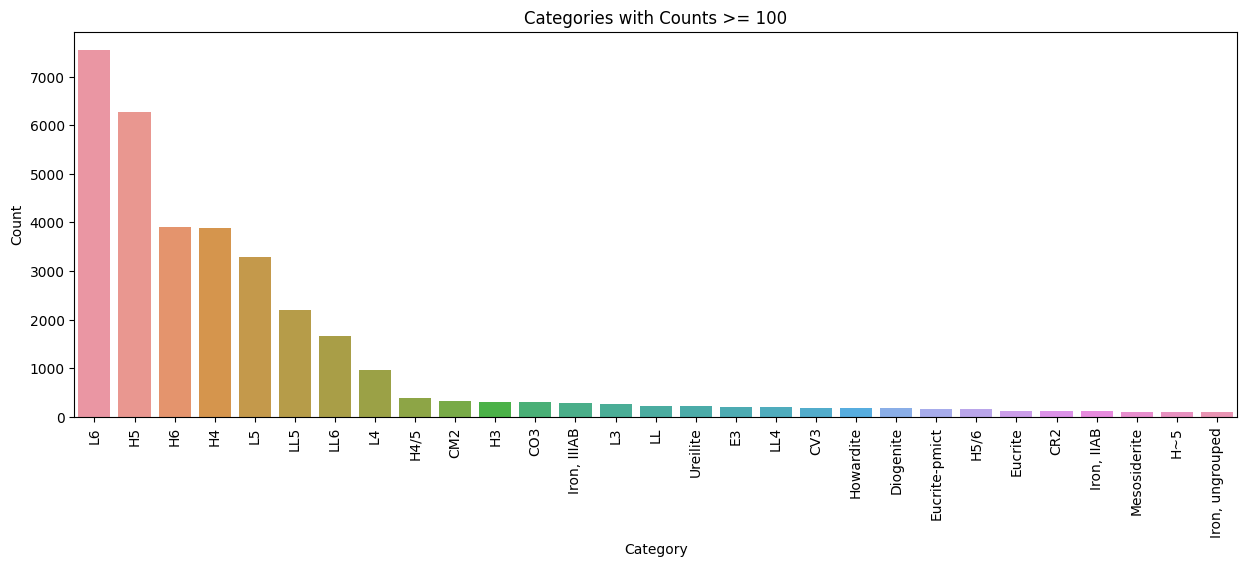

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=filtered_cats.index, y=filtered_cats.values)
plt.title('Categories with Counts >= 100')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
import geodatasets

In [75]:
df_geo = gpd.GeoDataFrame(meteor, geometry = gpd.points_from_xy(meteor.reclong, meteor.reclat))


In [76]:
df_geo

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,POINT (6.08333 50.77500)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,POINT (10.23333 56.18333)
2,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,POINT (-105.41667 26.80000)
3,Abbott,5,Valid,H3-6,21100.0,Found,1951.0,36.30000,-104.28333,POINT (-104.28333 36.30000)
4,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,POINT (-113.00000 54.21667)
...,...,...,...,...,...,...,...,...,...,...
38395,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,POINT (-118.55319 40.89201)
38396,Antelope,57455,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465,POINT (-118.54465 40.90183)
38397,Northwest Africa 7870,57456,Valid,L4,42.0,Found,2004.0,0.00000,0.00000,POINT (0.00000 0.00000)
38398,Northwest Africa 7871,57457,Valid,L6,450.0,Found,2004.0,0.00000,0.00000,POINT (0.00000 0.00000)


In [77]:
world_data = gpd.read_file('ne_10m_admin_0_countries.shp')

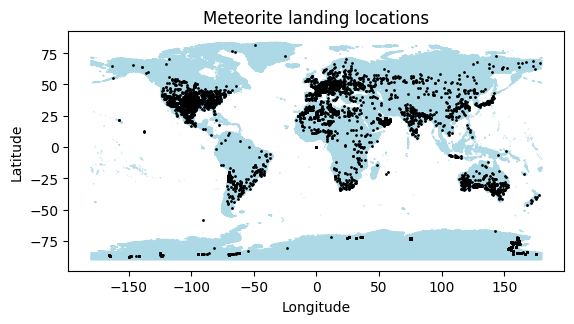

In [81]:
axis = world_data.plot(color = 'lightblue', edgecolor = 'lightblue')

df_geo.plot(ax = axis, color = 'black', markersize=1)
plt.title('Meteorite landing locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

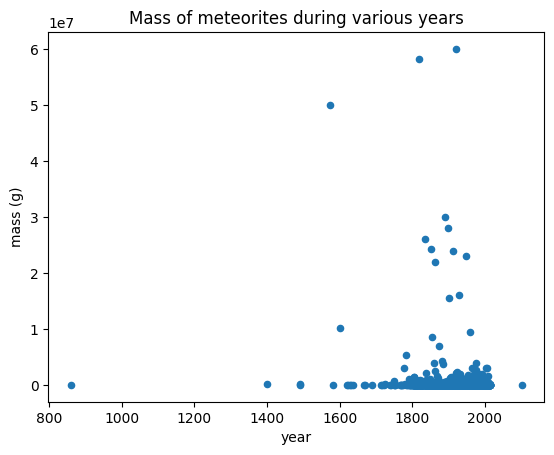

In [85]:
meteor.plot('year', 'mass (g)', kind = 'scatter')
plt.title("Mass of meteorites during various years")
plt.show()